<a href="https://colab.research.google.com/github/gfeyzakorkmaz/gfeyzakorkmaz/blob/main/pythonday19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
path = '/content/drive/MyDrive/Dataset/extended_marketing_data.xlsx'

In [3]:
df = pd.read_excel(path)

In [6]:
from sklearn.preprocessing import LabelEncoder

data = pd.read_excel(path)

label_encoder = LabelEncoder()
data['Gender_Encoded'] = label_encoder.fit_transform(data['Gender'])

print(data[['Gender', 'Gender_Encoded']].head())

  Gender  Gender_Encoded
0      F               0
1      M               1
2      F               0
3      M               1
4      F               0


In [7]:
from sklearn.model_selection import train_test_split

x = data[['Age', 'Total Spent', 'Gender_Encoded']]
y = data['Converted']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape, x_test.shape)

(12, 3) (3, 3)


In [8]:
print(y_train.shape, y_test.shape)

(12,) (3,)


In [9]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

y_pred = logistic_model.predict(x_test)

print("Predictions:", y_pred)

Predictions: [1 1 1]


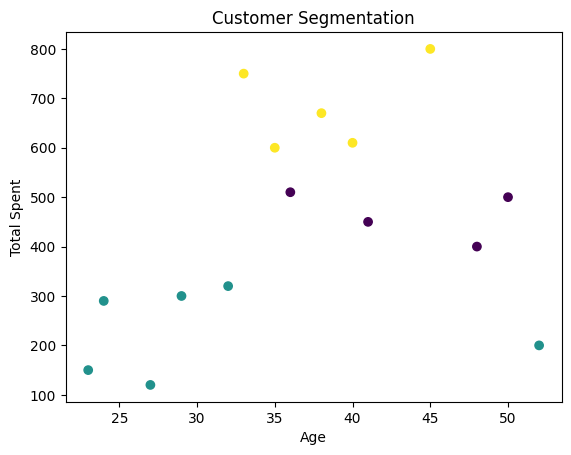

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['Age', 'Total Spent', 'Gender_Encoded']])

plt.scatter(data['Age'], data['Total Spent'], c=data['cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Total Spent')
plt.title('Customer Segmentation')
plt.show()

In [12]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[0 1]
 [0 2]]
